In [3]:
import numpy as np
import math
import random as rng
import copy
import matplotlib.pyplot as plt

In [4]:
#build the checker board of nxn dimensions (with an outside border)
def create_board(n):
    board = np.zeros((n+4, n+4))
    for i in range(n+4):
        for j in range(n+4):

            if i == 0 or i == 1 or i == n+3 or i == n+2:
                board[i][j] =1

            elif j <=1 or j>=n+2:
                board[i][j] =1
    return board


In [5]:

def add_border(matrix):
    # Find the maximum row length in the input matrix
    max_row_length = max(len(row) for row in matrix)
    
    # Create a new matrix with additional 2 rows and 2 columns of ones
    new_matrix = []
    
    # Add the top border
    for _ in range(2):
        new_matrix.append([1] * (max_row_length + 4))

    #length of row border
    bordered_length = len(new_matrix[0])
    for row in matrix:
        
        difference = (len(new_matrix[0]) - len(row))
        if difference %2 == 0:
            row = int(difference/2) * [1] + row + int(difference/2) * [1] 
            new_matrix.append(row)
        else:
            row = (difference // 2) * [1] + row + (difference // 2 + 1) * [1]
            new_matrix.append(row)
        
    
    for _ in range(2):
        new_matrix.append([1] * (max_row_length + 4))
    
    return np.array(new_matrix)


In [6]:
#helper function that generates a board around the specified point
def sub_board(board, point):
    row = point[0]
    col = point[1]
    
    row_bottom = row-2
    row_top = row+2
    row_slice = np.array(board[row_bottom:row_top+1])# it doesn't include the last element so we add one

    col_bottom = col-2
    col_top = col+2
    sub_tile = row_slice[:,col_bottom:col_top+1]
    
    return sub_tile

In [7]:
#takes a board and a point and returns a list of valid indices
def valid_moves(board, point):
    
    board_options = np.zeros((5,5))
    for i in [0, 1, 3, 4]:
        if i == 0 or i == 4:
            board_options[i][1] =1
            board_options[i][3] =1
        elif i == 1 or i == 3:
            board_options[i][0] =1
            board_options[i][4] =1

    x = ~board_options.astype(bool)
    board_moves = x.astype(int)

    
    #grabs a current subboard of entry board and plots avaible and allowed moves
    sub_tile = sub_board(board, point)
    imposed = (sub_tile.astype(bool) | board_moves.astype(bool)).astype(int)
    
    #find zero indices with respect to subboard
    zero_indices = np.argwhere(imposed == 0)
    board_move = []

    #convert indices to big board scale
    for i in zero_indices:
        starting_point = [2, 2]
        x = ((starting_point[0] - i[0])*-1)+point[0]
        y = ((starting_point[1] - i[1])*-1)+point[1]
        board_move.append([x,y])
    #return the possible available & allowed move indices in a list
    
    #if there are no available moves return NONE
    if len(board_move) == 0:
        pass
    
    return board_move




In [9]:
def least_deg(board, move_lst):
    deg_seq = []
    
    if move_lst:
        for move in move_lst:
            deg = len(valid_moves(board, move))
            deg_seq.append(deg)
        
        # Determine the minimum value in deg_seq
        min_deg = min(deg_seq)

        # Find all indices in deg_seq with the minimum degree
        min_indices = [i for i, deg in enumerate(deg_seq) if deg == min_deg]
        
        # If there is more than one move with the minimum degree, apply tie-breaker
        if len(min_indices) > 1:
            secondary_sums = []

            for i in min_indices:
                move_sum = 0
                secondary_moves = valid_moves(board, move_lst[i])
                for j in secondary_moves:
                    num_moves = len(valid_moves(board, j))
                    move_sum += num_moves

                secondary_sums.append(move_sum)
            
            # Find the index of the minimum secondary sum
            min_ira_index = secondary_sums.index(min(secondary_sums))
            # Return the move corresponding to the min_ira_index in min_indices
            return move_lst[min_indices[min_ira_index]]
                
        # Return the move with the minimum degree
        return move_lst[min_indices[0]]
    else:
        return None




In [10]:
def adjacent_grid(board):
    copy_board = np.copy(board)
    n = len(board)-4
    for i in range(2, n+2):
        for j in range(3, n+2, 2):
            for k in range(2, n+2, 2):
                if i % 2 == 0:
                    copy_board[i, j] = 1
                else:
                    
                    copy_board[i, k] = 1
    #starting point selected from elements of the same color as the corners
    
    open_start = np.argwhere(copy_board == 0)
    return open_start


In [11]:
def nxn(board):
    if len(board) == len(board[0]):
        return True


In [12]:
def find_zeros(matrix):
    # Convert the input list to a NumPy array if it is not already one
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    
    # Use np.argwhere to find indices of elements that are zero
    zero_indices = np.argwhere(matrix == 0)
    
    # Convert the result to a list of tuples
    zero_indices = [list(index) for index in zero_indices]
    
    return zero_indices
               

In [13]:
def Warnsdoff(start_board, start = 0, count = 0):
    #generate board of n dimensions
    board = add_border(start_board)
    is_nxn = 0
    
    #starting point selected from elements of the same color as the corners ( if nxn)
    if start == 0:
        if nxn(start_board) == True:
            start_choice = adjacent_grid(board)
            starter_index = np.random.choice(range(0, len(start_choice)))
            start = start_choice[starter_index]
            is_nxn += 1

        #starting point selected from any vertex
        else:
            start = rng.choice(find_zeros(board))
        
    
    start_store = []
    start_store.append(start)

    indices = [start]
    if count == 0:
        count = 1.0
    else:
         count = count
    
    #mark starting position with "count"
    board[start[0]] [start[1]] = count
    count+=1.0
    
    #dimension of the board
    cell_count = 0
    for i in start_board:
        cell_count+= len(i)
    
    
    i = 0
    cells_checked = 1
    while np.count_nonzero(board == 0):
        if cells_checked == cell_count-1:
            print("FAILURE NO HAMILTONIAN PATH EXISTS")
            break
        
        moves = valid_moves(board, start)
        deg = least_deg(board, moves)
        
        if deg is None:
            print(f"{board}\n")
            board = add_border(start_board)
            poss_start = list(find_zeros(board))
            for j in start_store:
                if type(j)!= list:
                    item = j.tolist()
                else:
                    item = j
                if item in poss_start:
                    poss_start.remove(item)
                    
            cells_checked += 1
            start = rng.choice(poss_start)
            count = 0.0
            cells_checked +=1
            continue
        
        start = deg

        indices.append(start)
        board[start[0]][start[1]] = count
        count += 1.0
        i += 1

    

        
    
    
    return np.array(board), indices
diamond = [[0], [0, 0, 0, 0,0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
trial = [[0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0]]
trial_2 = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
trial_3 = np.zeros((5,5), dtype = int).tolist()
#adjusting the "n" values adjusts the dimensions of the checker board
results = Warnsdoff(trial)


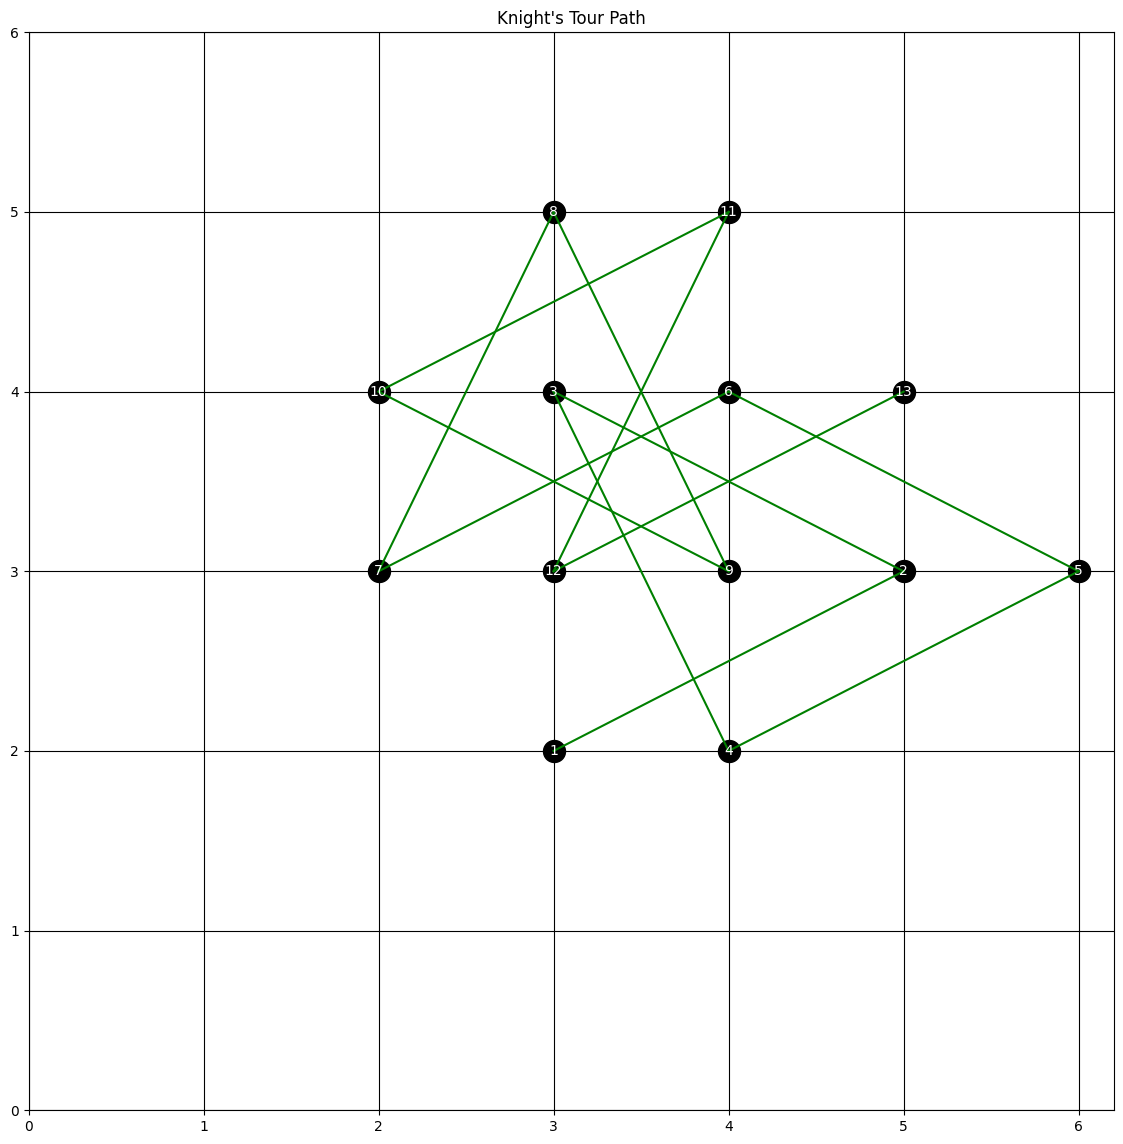

In [16]:
# List of indices representing moves
moves = results[1]
dim = int(np.sqrt(len(moves)) + 4)
# Create a 9x9 grid
grid = [[0 for _ in range(dim)] for _ in range(dim)]

# Plot the grid
plt.figure(figsize=(14, 14))


# Add annotations for the moves
for i, (dx, dy) in enumerate(moves):
    plt.scatter(dy,dx, s= 250, c = 'black')
    plt.text(dy, dx, str(i + 1), ha='center', va='center', color='white')

for i in range(0, len(moves)-1):
    x1, y1 = moves[i]
    x2, y2 = moves[i+1]
    plt.plot([y1, y2], [x1, x2], color='green')

plt.xticks(range(dim))
plt.yticks(range(dim))
plt.title("Knight's Tour Path")
plt.grid(color='black')
plt.show()
        